# Quick tutorial for PyPhotometryCam

## I haven't finished the install script yet. So, for now just add the directory to your python path.

In [12]:
import sys
sys.path.append('/Users/tony/Desktop/NightlyPhotometry/PyPhotometryCam')
import seaborn as sns
sns.set_context('poster')

In [2]:
from PyPhotometryCam.imageAnalyzer import imageAnalyzer,timeSeriesAnalyzer
from PyPhotometryCam.utils.calib import loadFlatfieldHist 


Welcome to JupyROOT 6.10/08


# Load flat field image as numpy array and stored into a nested dictionary



In [3]:
# Put flat filed image in a ditctionary indexed by filter id (1 to 4)
filter_dict = {3:loadFlatfieldHist('./FlatfieldData/FlatfieldSept2016/flatfield-t1/FlatfieldT1F3.root')}
# And put that dictionary into another dictionary indexed by telescope id (1 to 4)
ff_dict ={1:filter_dict}
# The internal of imageAnalyzer uses ff_dict[telid][filterid] to find the correct flatfiled image


# Analyze a single image
## The analyze function returns a DataFrame with the fit result of every star specified by the astrometry search.

In [4]:
# Initiate an image analyzer
# The star_list_dir is where the astrometry output is stored
# ff_dict is the dictionary for the flatfield image
ana = imageAnalyzer(star_list_dir='./StarCoordinates/',flat_field_dict=ff_dict)

In [101]:
# Analyze a single image and save good fit result into report name test.pdf
criteria = '(Chi2 < 2 ) & (Size >0 ) & (Size/SizeErr > 2.0 ) & (Width < 2.5)'
df_result = ana.analyze('./PhotometryCam/photometry_images_t1/T1_F3_050518_225200.fits',
                        output_pdf='example.pdf',print_criteria=criteria)                    

In [119]:
df_result.head()

,DEC,FLUX_B,FLUX_V,RA,name,xpos,ypos,Exposure,CCDTEMP,EL,...,BaseLineErr,Chi2,FitAxis,FitPosX,FitPosXErr,Size,SizeErr,Width,WidthErr,Time
0,4.416434,8.82,7.28,187.587551,V* BK Vir,578,76,10.0,6.641518,59.903993,...,8.810345,1.223797,0,10.138117,0.225565,1113.249757,216.371630,2.350831,0.351358,2018-05-05 22:52:00
1,4.854936,9.11,7.74,185.562597,V* KO Vir,678,90,10.0,6.641518,59.458124,...,8.646352,1.819342,1,9.616872,0.170088,1223.304240,205.860098,2.011990,0.257304,2018-05-05 22:52:00
2,3.312572,6.12,4.96,185.087422,* c Vir,674,169,10.0,6.641518,57.864553,...,9.180810,11.347142,1,9.746453,0.020048,21026.899773,350.995665,2.422917,0.027594,2018-05-05 22:52:00
3,-2.429562,8.49,6.90,187.290378,V* FZ Vir,474,393,10.0,6.641518,53.416771,...,7.897600,1.698099,0,9.964824,0.085651,2499.985230,207.119425,2.101134,0.129819,2018-05-05 22:52:00
4,0.769700,10.79,6.60,186.309979,V* SS Vir,574,264,10.0,6.641518,56.047634,...,10.806602,1.609629,0,9.325019,0.592252,724.359176,272.002062,3.535931,1.058742,2018-05-05 22:52:00


# Analyze a series of images

In [7]:
# Prepare a list of image files

runlist_F3 = ['./PhotometryCam/photometry_images_t1/T1_F3_050518_225200.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_225800.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_231500.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_231600.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_232000.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_232500.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_233000.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_233500.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_234000.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_234500.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_235000.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_235500.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_050518_235900.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_000000.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_000400.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_000500.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_001000.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_001500.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_002000.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_002400.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_002900.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_003400.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_003900.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_004400.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_004900.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_005400.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_005900.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_010400.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_010900.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_011400.fits',
       './PhotometryCam/photometry_images_t1/T1_F3_060518_011800.fits']

# Initialize a timeSeriesAnalyzer

In [8]:
# Initiate an time series analyzer
# The star_list_dir is where the astrometry output is stored
# ff_dict is the dictionary for the flatfield image
ts = timeSeriesAnalyzer(star_list_dir='./StarCoordinates/',flat_field_dict=ff_dict)

In [9]:
# The reports of single images into the folder run_pdf_dir
ts.analyze(runlist_F3,run_pdf_dir='./test')

./PhotometryCam/photometry_images_t1/T1_F3_050518_231500.fits does not have astrometry analysis result !
./PhotometryCam/photometry_images_t1/T1_F3_050518_235900.fits does not have astrometry analysis result !
./PhotometryCam/photometry_images_t1/T1_F3_060518_000400.fits does not have astrometry analysis result !
./PhotometryCam/photometry_images_t1/T1_F3_060518_011800.fits does not have astrometry analysis result !


# The throughput is defined as 

## $M_{B} + \frac{5}{2} log_{10} (\frac{Signal}{T_{exposure}})$

## where $M_{B}$ is the blue magnitude and Signal is the digital count given by the camera $T_{exposure}$ is the exposure time.
## The rational behind this definition is that we can write down the relationship between the detected signal and the flux of the star ($F_{B}$) as  

## $F_{B} e^{-\tau/cos(\theta_{zenith})}= A \frac{Signal}{T_{exposure}}  $ 
## $10^{-2/5\times M_{B}} \sim F_{B}  $
## where A is the conversion factor from digital counts to energy/photon. $\tau$ is the optical depth of the atmosphere.

## Taking $log_{10}$ on both side we get:
## $ M_{B} = -\frac{5}{2} log_{10} (A) -\frac{5}{2} log_{10} (\frac{Signal}{T_{exposure}}) - \frac{5 log_{10}(e)}{2}\tau/cos(\theta_{zenith}) -C_{0}$
## $C_0$ come from the proportional constant between $F_{B}$ and $10^{-2/5\times M_{B}} $
## Since A and $C_0$ are constants we can define the weather condition as 
## $M_{B} + \frac{5}{2} log_{10} (\frac{Signal}{T_{exposure}}) = -\frac{5}{2} log_{10} (A) -\frac{5 log_{10}(e)}{2}\tau/cos(\theta_{zenith}) -C_{0}$ which is controlled by the optical depth of the atmosphere. While there is suppose to be a zenith angle dependency, the effect seems to be smaller than our systematics at this point ( see the individual image report, one can see that the zenith angle dependency can't always be established within a single picture) so we'll ignore that for now. 


In [10]:
# Get time series of the throughput and result of all the stars
ts_r,all_star = ts.get_results()

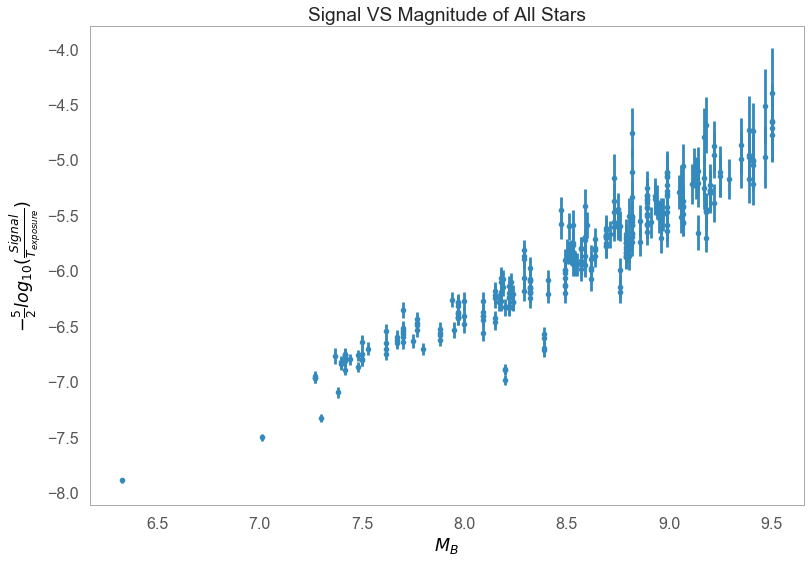

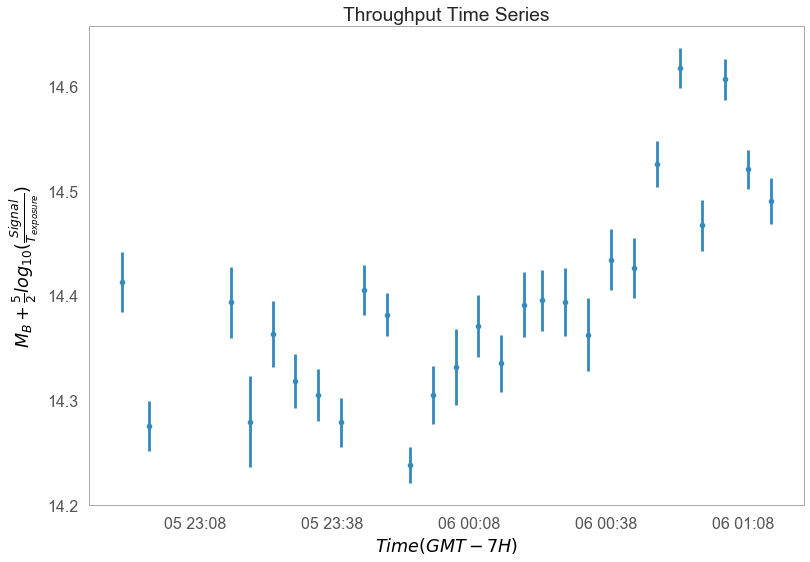

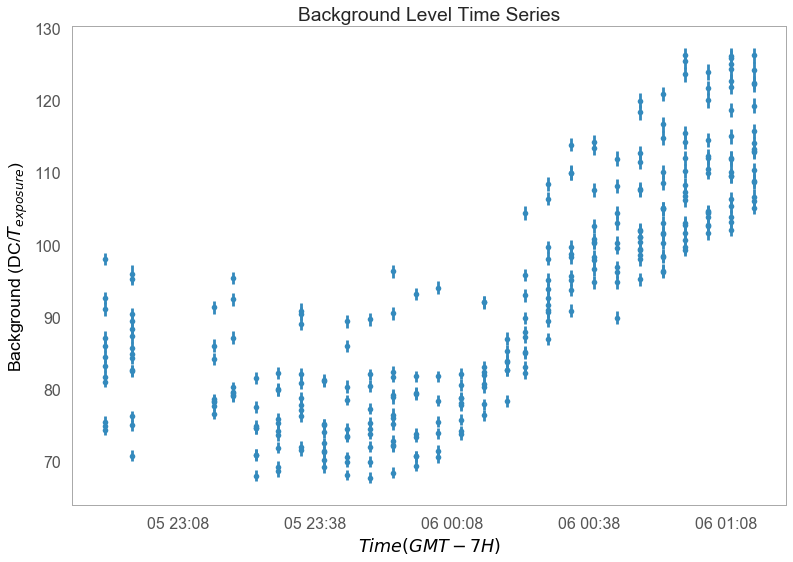

In [13]:
ts.show_result()

# Throughput from each picture

In [125]:
ts_r.head()

,Exposure,Time,oneOverCos,oneOverCosErr,throughput,throughputErr
0,10.0,2018-05-05 22:52:00,1.192789,0.010509,14.412889,0.028947
1,10.0,2018-05-05 22:58:00,1.193410,0.011164,14.275238,0.023753
2,10.0,2018-05-05 23:16:00,1.411210,0.017863,14.393389,0.034076
3,10.0,2018-05-05 23:20:00,1.418020,0.015893,14.279305,0.043274
4,10.0,2018-05-05 23:25:00,1.278696,0.014239,14.362725,0.031596


# All stars (pass quality cuts)

In [17]:
all_star.head()

,DEC,FLUX_B,FLUX_V,RA,name,xpos,ypos,Exposure,CCDTEMP,EL,...,Chi2,FitAxis,FitPosX,FitPosXErr,Size,SizeErr,Width,WidthErr,Time,PID
0,4.416434,8.82,7.28,187.587551,V* BK Vir,578,76,10.0,6.641518,59.903993,...,1.223797,0,10.138117,0.225565,1113.249757,216.371630,2.350831,0.351358,2018-05-05 22:52:00,0
1,4.854936,9.11,7.74,185.562597,V* KO Vir,678,90,10.0,6.641518,59.458124,...,1.819342,1,9.616872,0.170088,1223.304240,205.860098,2.011990,0.257304,2018-05-05 22:52:00,0
3,-2.429562,8.49,6.90,187.290378,V* FZ Vir,474,393,10.0,6.641518,53.416771,...,1.698099,0,9.964824,0.085651,2499.985230,207.119425,2.101134,0.129819,2018-05-05 22:52:00,0
5,0.193788,8.86,7.62,182.855832,HD 105911,722,350,10.0,6.641518,54.079815,...,1.566422,0,9.651789,0.144788,1982.379108,237.290029,2.472933,0.226589,2018-05-05 22:52:00,0
6,5.971564,9.29,7.73,186.047897,V* FK Vir,676,31,10.0,6.641518,60.673155,...,1.898875,1,9.225561,0.154553,1176.314465,198.690061,1.799342,0.230611,2018-05-05 22:52:00,0
